 # Identifying Parkinson's disease with Keras #

Approximately one million people have Parkinson’s disease in the U.S. and there are around 50,000 new cases diagnosed each year where most patients are middel-aged. Eventhough there are medications that can help patients with the symptom, there is no cure for Parkinson’s disease. 

In this project a model that identifies if a person has pakinson's disease or not using the Keras API in Tensorflow 2.0. In such deep learning framework multiple layers of neurons are built to identify the status of the patient. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Parkinsons_data.csv')

In [4]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


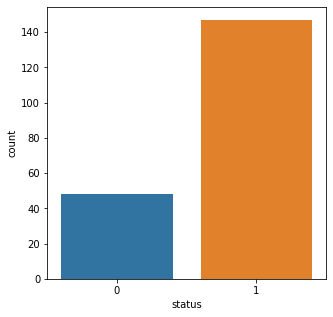

In [3]:
plt.figure(figsize=(5,5))
sns.countplot(df['status'])

In [6]:
df = df.drop(columns='name')

In [7]:
X = df.drop('status', axis=1).values
y = df['status'].values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [15]:
from tensorflow.keras.models import Sequential 

In [16]:
from tensorflow.keras.layers import Dense,Dropout

In [17]:
X_train.shape

(156, 22)

In [56]:
model = Sequential()

model.add(Dense(22, activation='relu'))

model.add(Dense(11, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [57]:
model.fit(x=X_train, y=y_train, epochs=400, validation_data = (X_test, y_test))

Train on 156 samples, validate on 39 samples
Epoch 1/400
156/156 [==============================] - 2s 11ms/sample - loss: 0.7489 - val_loss: 0.7433
Epoch 2/400
156/156 [==============================] - 0s 658us/sample - loss: 0.7244 - val_loss: 0.7235
Epoch 3/400
156/156 [==============================] - 0s 624us/sample - loss: 0.6999 - val_loss: 0.7042
Epoch 4/400
156/156 [==============================] - 0s 629us/sample - loss: 0.6792 - val_loss: 0.6862
Epoch 5/400
156/156 [==============================] - 0s 601us/sample - loss: 0.6594 - val_loss: 0.6694
Epoch 6/400
156/156 [==============================] - 0s 627us/sample - loss: 0.6395 - val_loss: 0.6500
Epoch 7/400
156/156 [==============================] - 0s 614us/sample - loss: 0.6193 - val_loss: 0.6291
Epoch 8/400
156/156 [==============================] - 0s 636us/sample - loss: 0.5978 - val_loss: 0.6081
Epoch 9/400
156/156 [==============================] - 0s 627us/sample - loss: 0.5778 - val_loss: 0.5887
Epoch 10/40

Epoch 78/400
156/156 [==============================] - 0s 695us/sample - loss: 0.3057 - val_loss: 0.2917
Epoch 79/400
156/156 [==============================] - 0s 718us/sample - loss: 0.3054 - val_loss: 0.2937
Epoch 80/400
156/156 [==============================] - 0s 728us/sample - loss: 0.3032 - val_loss: 0.2917
Epoch 81/400
156/156 [==============================] - 0s 693us/sample - loss: 0.3020 - val_loss: 0.2912
Epoch 82/400
156/156 [==============================] - 0s 620us/sample - loss: 0.3005 - val_loss: 0.2905
Epoch 83/400
156/156 [==============================] - 0s 644us/sample - loss: 0.2990 - val_loss: 0.2885
Epoch 84/400
156/156 [==============================] - 0s 620us/sample - loss: 0.2978 - val_loss: 0.2874
Epoch 85/400
156/156 [==============================] - 0s 615us/sample - loss: 0.2968 - val_loss: 0.2876
Epoch 86/400
156/156 [==============================] - 0s 606us/sample - loss: 0.2959 - val_loss: 0.2883
Epoch 87/400
156/156 [========================

Epoch 155/400
156/156 [==============================] - 0s 656us/sample - loss: 0.2279 - val_loss: 0.2734
Epoch 156/400
156/156 [==============================] - 0s 679us/sample - loss: 0.2272 - val_loss: 0.2780
Epoch 157/400
156/156 [==============================] - 0s 628us/sample - loss: 0.2258 - val_loss: 0.2777
Epoch 158/400
156/156 [==============================] - 0s 671us/sample - loss: 0.2251 - val_loss: 0.2784
Epoch 159/400
156/156 [==============================] - 0s 582us/sample - loss: 0.2236 - val_loss: 0.2750
Epoch 160/400
156/156 [==============================] - 0s 619us/sample - loss: 0.2231 - val_loss: 0.2731
Epoch 161/400
156/156 [==============================] - 0s 614us/sample - loss: 0.2225 - val_loss: 0.2706
Epoch 162/400
156/156 [==============================] - 0s 607us/sample - loss: 0.2220 - val_loss: 0.2712
Epoch 163/400
156/156 [==============================] - 0s 575us/sample - loss: 0.2213 - val_loss: 0.2753
Epoch 164/400
156/156 [==============

156/156 [==============================] - 0s 626us/sample - loss: 0.1760 - val_loss: 0.2611
Epoch 232/400
156/156 [==============================] - 0s 637us/sample - loss: 0.1754 - val_loss: 0.2602
Epoch 233/400
156/156 [==============================] - 0s 877us/sample - loss: 0.1747 - val_loss: 0.2525
Epoch 234/400
156/156 [==============================] - 0s 856us/sample - loss: 0.1742 - val_loss: 0.2488
Epoch 235/400
156/156 [==============================] - 0s 827us/sample - loss: 0.1739 - val_loss: 0.2548
Epoch 236/400
156/156 [==============================] - 0s 915us/sample - loss: 0.1729 - val_loss: 0.2536
Epoch 237/400
156/156 [==============================] - 0s 694us/sample - loss: 0.1733 - val_loss: 0.2518
Epoch 238/400
156/156 [==============================] - 0s 627us/sample - loss: 0.1716 - val_loss: 0.2568
Epoch 239/400
156/156 [==============================] - 0s 611us/sample - loss: 0.1715 - val_loss: 0.2566
Epoch 240/400
156/156 [============================

Epoch 308/400
156/156 [==============================] - 0s 633us/sample - loss: 0.1443 - val_loss: 0.2492
Epoch 309/400
156/156 [==============================] - 0s 630us/sample - loss: 0.1419 - val_loss: 0.2438
Epoch 310/400
156/156 [==============================] - 0s 807us/sample - loss: 0.1423 - val_loss: 0.2359
Epoch 311/400
156/156 [==============================] - 0s 656us/sample - loss: 0.1410 - val_loss: 0.2410
Epoch 312/400
156/156 [==============================] - 0s 690us/sample - loss: 0.1404 - val_loss: 0.2422
Epoch 313/400
156/156 [==============================] - 0s 875us/sample - loss: 0.1412 - val_loss: 0.2513
Epoch 314/400
156/156 [==============================] - 0s 683us/sample - loss: 0.1398 - val_loss: 0.2448
Epoch 315/400
156/156 [==============================] - 0s 646us/sample - loss: 0.1394 - val_loss: 0.2379
Epoch 316/400
156/156 [==============================] - 0s 683us/sample - loss: 0.1391 - val_loss: 0.2395
Epoch 317/400
156/156 [==============

156/156 [==============================] - 0s 848us/sample - loss: 0.1185 - val_loss: 0.2411
Epoch 385/400
156/156 [==============================] - 0s 875us/sample - loss: 0.1164 - val_loss: 0.2284
Epoch 386/400
156/156 [==============================] - 0s 877us/sample - loss: 0.1170 - val_loss: 0.2224
Epoch 387/400
156/156 [==============================] - 0s 862us/sample - loss: 0.1164 - val_loss: 0.2285
Epoch 388/400
156/156 [==============================] - 0s 851us/sample - loss: 0.1154 - val_loss: 0.2317
Epoch 389/400
156/156 [==============================] - 0s 787us/sample - loss: 0.1149 - val_loss: 0.2290
Epoch 390/400
156/156 [==============================] - 0s 648us/sample - loss: 0.1144 - val_loss: 0.2242
Epoch 391/400
156/156 [==============================] - 0s 642us/sample - loss: 0.1147 - val_loss: 0.2247
Epoch 392/400
156/156 [==============================] - 0s 620us/sample - loss: 0.1144 - val_loss: 0.2274
Epoch 393/400
156/156 [============================

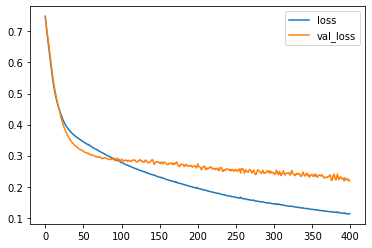

In [58]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [62]:
model = Sequential()

model.add(Dense(22, activation='relu'))

model.add(Dense(11, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [60]:
from tensorflow.keras.callbacks import EarlyStopping

In [61]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [63]:
model.fit(x=X_train, y=y_train, epochs=400, validation_data = (X_test, y_test),
         callbacks=[early_stop])

Train on 156 samples, validate on 39 samples
Epoch 1/400
156/156 [==============================] - 1s 9ms/sample - loss: 0.7107 - val_loss: 0.6923
Epoch 2/400
156/156 [==============================] - 0s 626us/sample - loss: 0.6869 - val_loss: 0.6764
Epoch 3/400
156/156 [==============================] - 0s 659us/sample - loss: 0.6669 - val_loss: 0.6643
Epoch 4/400
156/156 [==============================] - 0s 636us/sample - loss: 0.6486 - val_loss: 0.6528
Epoch 5/400
156/156 [==============================] - 0s 655us/sample - loss: 0.6339 - val_loss: 0.6388
Epoch 6/400
156/156 [==============================] - 0s 699us/sample - loss: 0.6190 - val_loss: 0.6249
Epoch 7/400
156/156 [==============================] - 0s 782us/sample - loss: 0.6043 - val_loss: 0.6108
Epoch 8/400
156/156 [==============================] - 0s 684us/sample - loss: 0.5882 - val_loss: 0.5959
Epoch 9/400
156/156 [==============================] - 0s 616us/sample - loss: 0.5715 - val_loss: 0.5809
Epoch 10/400

Epoch 78/400
156/156 [==============================] - 0s 646us/sample - loss: 0.2925 - val_loss: 0.2787
Epoch 79/400
156/156 [==============================] - 0s 584us/sample - loss: 0.2912 - val_loss: 0.2778
Epoch 80/400
156/156 [==============================] - 0s 613us/sample - loss: 0.2897 - val_loss: 0.2772
Epoch 81/400
156/156 [==============================] - 0s 629us/sample - loss: 0.2883 - val_loss: 0.2758
Epoch 82/400
156/156 [==============================] - 0s 638us/sample - loss: 0.2877 - val_loss: 0.2744
Epoch 83/400
156/156 [==============================] - 0s 641us/sample - loss: 0.2857 - val_loss: 0.2732
Epoch 84/400
156/156 [==============================] - 0s 609us/sample - loss: 0.2849 - val_loss: 0.2717
Epoch 85/400
156/156 [==============================] - 0s 592us/sample - loss: 0.2836 - val_loss: 0.2706
Epoch 86/400
156/156 [==============================] - 0s 603us/sample - loss: 0.2828 - val_loss: 0.2697
Epoch 87/400
156/156 [========================

Epoch 155/400
156/156 [==============================] - 0s 761us/sample - loss: 0.2124 - val_loss: 0.2228
Epoch 156/400
156/156 [==============================] - 0s 746us/sample - loss: 0.2114 - val_loss: 0.2232
Epoch 157/400
156/156 [==============================] - 0s 781us/sample - loss: 0.2106 - val_loss: 0.2226
Epoch 158/400
156/156 [==============================] - 0s 646us/sample - loss: 0.2093 - val_loss: 0.2205
Epoch 159/400
156/156 [==============================] - 0s 665us/sample - loss: 0.2088 - val_loss: 0.2202
Epoch 160/400
156/156 [==============================] - 0s 982us/sample - loss: 0.2075 - val_loss: 0.2199
Epoch 161/400
156/156 [==============================] - 0s 1ms/sample - loss: 0.2066 - val_loss: 0.2195
Epoch 162/400
156/156 [==============================] - 0s 664us/sample - loss: 0.2052 - val_loss: 0.2194
Epoch 163/400
156/156 [==============================] - 0s 633us/sample - loss: 0.2044 - val_loss: 0.2170
Epoch 164/400
156/156 [================

156/156 [==============================] - 0s 615us/sample - loss: 0.1442 - val_loss: 0.1808
Epoch 232/400
156/156 [==============================] - 0s 631us/sample - loss: 0.1433 - val_loss: 0.1814
Epoch 233/400
156/156 [==============================] - 0s 596us/sample - loss: 0.1440 - val_loss: 0.1778
Epoch 234/400
156/156 [==============================] - 0s 669us/sample - loss: 0.1425 - val_loss: 0.1805
Epoch 235/400
156/156 [==============================] - 0s 928us/sample - loss: 0.1412 - val_loss: 0.1797
Epoch 236/400
156/156 [==============================] - 0s 1ms/sample - loss: 0.1407 - val_loss: 0.1784
Epoch 237/400
156/156 [==============================] - 0s 717us/sample - loss: 0.1405 - val_loss: 0.1798
Epoch 238/400
156/156 [==============================] - 0s 1ms/sample - loss: 0.1399 - val_loss: 0.1756
Epoch 239/400
156/156 [==============================] - 0s 1ms/sample - loss: 0.1387 - val_loss: 0.1754
Epoch 240/400
156/156 [==============================] - 

156/156 [==============================] - 0s 701us/sample - loss: 0.0987 - val_loss: 0.1532
Epoch 309/400
156/156 [==============================] - 0s 686us/sample - loss: 0.0981 - val_loss: 0.1554
Epoch 310/400
156/156 [==============================] - 0s 675us/sample - loss: 0.0979 - val_loss: 0.1529
Epoch 311/400
156/156 [==============================] - 0s 637us/sample - loss: 0.0972 - val_loss: 0.1552
Epoch 312/400
156/156 [==============================] - 0s 661us/sample - loss: 0.0970 - val_loss: 0.1522
Epoch 313/400
156/156 [==============================] - 0s 659us/sample - loss: 0.0962 - val_loss: 0.1519
Epoch 314/400
156/156 [==============================] - 0s 681us/sample - loss: 0.0955 - val_loss: 0.1530
Epoch 315/400
156/156 [==============================] - 0s 654us/sample - loss: 0.0952 - val_loss: 0.1547
Epoch 316/400
156/156 [==============================] - 0s 675us/sample - loss: 0.0952 - val_loss: 0.1545
Epoch 317/400
156/156 [============================

156/156 [==============================] - 0s 798us/sample - loss: 0.0669 - val_loss: 0.1390
Epoch 385/400
156/156 [==============================] - 0s 691us/sample - loss: 0.0665 - val_loss: 0.1401
Epoch 386/400
156/156 [==============================] - 0s 685us/sample - loss: 0.0666 - val_loss: 0.1383
Epoch 387/400
156/156 [==============================] - 0s 672us/sample - loss: 0.0658 - val_loss: 0.1414
Epoch 388/400
156/156 [==============================] - 0s 672us/sample - loss: 0.0658 - val_loss: 0.1450
Epoch 389/400
156/156 [==============================] - 0s 604us/sample - loss: 0.0655 - val_loss: 0.1442
Epoch 390/400
156/156 [==============================] - 0s 627us/sample - loss: 0.0648 - val_loss: 0.1405
Epoch 391/400
156/156 [==============================] - 0s 643us/sample - loss: 0.0647 - val_loss: 0.1366
Epoch 392/400
156/156 [==============================] - 0s 726us/sample - loss: 0.0649 - val_loss: 0.1337
Epoch 393/400
156/156 [============================

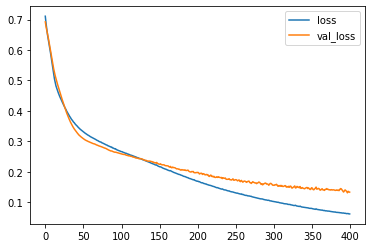

In [64]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [65]:
prediction = model.predict_classes(X_test)

In [66]:
from sklearn.metrics import classification_report,confusion_matrix

In [67]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.90      1.00      0.95        28

    accuracy                           0.92        39
   macro avg       0.95      0.86      0.90        39
weighted avg       0.93      0.92      0.92        39



In [68]:
print(confusion_matrix(y_test, prediction))

[[ 8  3]
 [ 0 28]]
